# Basic Convolutional Neural Networks (CNN)
- Objective: create basic CNN models with Keras

<img src="https://adeshpande3.github.io/assets/Cover.png" style="width: 800px"/>

<br>
- Fundamental CNN structures: CNNs are similar to MLPs since they only feed signals forward (feedforward nets), but have different kind of layers unique to CNNs
    - ** Convolutional layer** : process data in a small receptive field (i.e., filter)
    - ** Pooling layer** : downsample along 2 dimensions (usually width and height) 
    - ** Dense (fully connected) layer** : similar to hidden layers of MLPs

<img src="http://cs231n.github.io/assets/cnn/convnet.jpeg" style="width: 600px"/>
<br>
<center> **ConvNet architecture** </center>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

### Load Datset
- Digits dataset in sklearn
- Doc: http://scikit-learn.org/stable/auto_examples/datasets/plot_digits_last_image.html

In [2]:
data = datasets.load_digits()

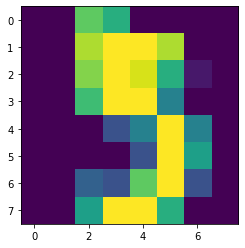

label:  5


In [9]:
plt.imshow(data.images[5])    # show first number in the dataset
plt.show()
print('label: ', data.target[5])    # label = '0'

In [10]:
X_data = data.images
y_data = data.target

In [11]:
# shape of data
print(X_data.shape)    # (8 X 8) format
print(y_data.shape)

(1797, 8, 8)
(1797,)


In [12]:
# reshape X_data into 3-D format
# note that this follows image format of Tensorflow backend
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))

In [15]:
y_data

array([0, 1, 2, ..., 8, 9, 8])

In [14]:
X_data.shape

(1797, 8, 8, 1)

In [16]:
# one-hot encoding of y_data
y_data = to_categorical(y_data)

In [17]:
y_data

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [18]:
# partition data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1257, 8, 8, 1)
(540, 8, 8, 1)
(1257, 10)
(540, 10)


In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

### 1. Creating model
- Creating a model is same with MLP (Sequential)

In [56]:
model = Sequential()

### 2. Convolutional Layer
- In general, 2D convolutional layer is used for image processing
    - Size of filter (designated by 'kernel_size' parameter) defines **width and height of receptive field **
    - Number of filters (designated by 'filters' parameter) is equal to **depth of the next layer**
    - Strides (designated by 'strides' parameter) is** how far a filter makes change in its position** for each move
    - Image can be **zero-padded** in order to prevent getting too small (designated by 'padding' parameter)
- Doc: https://keras.io/layers/convolutional/
<img src="http://cs231n.github.io/assets/cnn/depthcol.jpeg" style="width: 400px"/>

In [57]:
# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'same'))

### 3. Activation Layer
- Identical to the activation layers in MLP
- In general, relu is used as well
- Doc: http://cs231n.github.io/assets/cnn/depthcol.jpeg

In [58]:
model.add(Activation('relu'))

### 4. Pooling layer
- In general, max pooling method is used
- Reduces number of parameters
- Doc: https://keras.io/layers/pooling/
<img src="http://cs231n.github.io/assets/cnn/maxpool.jpeg" style="width: 600px"/>

In [59]:
model.add(MaxPooling2D(pool_size = (2,2)))

### 5. Dense (fully connected layer)
- Convolutional & pooling layers can be connected to dense layers
- Sometimes, dense layers can be omitted
- Doc: https://keras.io/layers/core/

In [60]:
# prior layer should be flattend to be connected to dense layers
model.add(Flatten())

In [61]:
# dense layer with 50 neurons
model.add(Dense(50, activation = 'relu'))

In [62]:
# final layer with 10 neurons to classify the instances
model.add(Dense(10, activation = 'softmax'))

### 6. Model compile & train
- Identical to compiling MLP models

In [63]:
adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [64]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 8, 8, 10)          50        
_________________________________________________________________
activation_1 (Activation)    (None, 8, 8, 10)          0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 10)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                8050      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
____________________________________________________

In [65]:
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 1)

Epoch 1/100
21/21 [==============================] - 1s 10ms/step - loss: 2.7535 - accuracy: 0.1045 - val_loss: 2.0863 - val_accuracy: 0.3452
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 1.7753 - accuracy: 0.4706 - val_loss: 1.3802 - val_accuracy: 0.6865
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 1.1768 - accuracy: 0.7065 - val_loss: 0.8327 - val_accuracy: 0.8254
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7285 - accuracy: 0.8408 - val_loss: 0.5160 - val_accuracy: 0.8730
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4767 - accuracy: 0.8905 - val_loss: 0.3840 - val_accuracy: 0.8849
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.3369 - accuracy: 0.9254 - val_loss: 0.2792 - val_accuracy: 0.9127
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.9393 - val_loss: 0.2418 - val_accuracy: 0.9087
Epoch 8/100


Epoch 59/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.0771 - val_accuracy: 0.9841
Epoch 60/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000 - val_loss: 0.0770 - val_accuracy: 0.9841
Epoch 61/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0780 - val_accuracy: 0.9841
Epoch 62/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.0759 - val_accuracy: 0.9841
Epoch 63/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000 - val_loss: 0.0777 - val_accuracy: 0.9841
Epoch 64/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9841
Epoch 65/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.0764 - val_accuracy: 0.9841
Epoch 

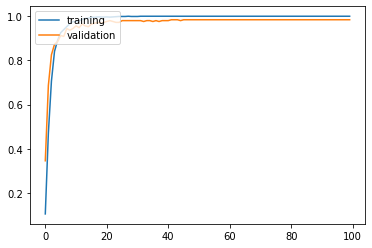

In [66]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

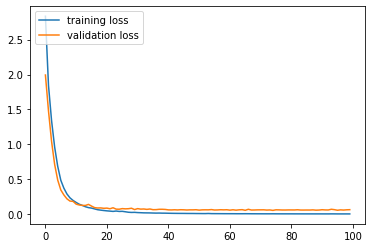

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training loss', 'validation loss'], loc = 'upper left')
plt.show()

In [33]:
results = model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.0744 - accuracy: 0.9815


In [34]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9814814925193787


In [35]:
X_test.shape

(540, 8, 8, 1)

In [37]:
X_test[0, :, :, :].reshape(1, 8, 8,1).shape

(1, 8, 8, 1)

In [50]:
preds = model.predict(X_test[500, :, :, :].reshape(1, 8, 8, 1))

In [51]:
preds

array([[3.4550595e-07, 1.2252253e-06, 9.9999321e-01, 4.8415658e-09,
        2.5057085e-09, 1.7192052e-10, 3.8590499e-11, 2.5375007e-08,
        5.0728654e-06, 1.4367169e-08]], dtype=float32)

In [52]:
import numpy as np
output = np.argmax(preds)

In [53]:
output

2

In [54]:
y_test[500]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

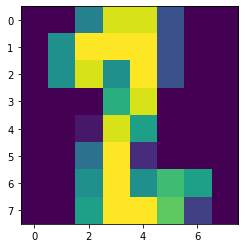

In [55]:
plt.imshow(X_test[500, :, :, :].reshape(8, 8))

Even simple CNN model shows fine performance of **97% **test accuracy